# Classification Algorithms
## Summary
- binary classification
- create fake data with noisy conditional 
- logistic regression for binary classification (true/false, health/sick, employed/unemployed,...)
- Regularized Logistic Regression 
- Tree ensemble algorithms

### Logistic Regression
Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution. 

### Regularization
Regularization is any modification we make to a learning algorithm that is intended to reduce its generalization error but not its training error.

![text](data/regularization_for_logistic_regression_-_figure1.png)

### Setup Dependencies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

### Binary Classification

In [2]:
raw_df = pd.read_csv('data/employee_data.csv')

print(raw_df.status.unique())
raw_df.status.head()

['Left' 'Employed']


0        Left
1    Employed
2    Employed
3    Employed
4    Employed
Name: status, dtype: object

In [3]:
# analytical base table 
abt_df = pd.read_csv('data/analytical_base_table.csv')
print(abt_df.status.unique())
abt_df.status.head()

[1 0]


0    1
1    0
2    0
3    0
4    0
Name: status, dtype: int64

### Noisy Conditional

In [4]:
# Input Feature
x = np.linspace(0,1,100)
# Noise
np.random.seed(555)
noise = np.random.uniform(-0.2, 0.2, 100)

# Target Variable
y = ((x + noise) > 0.5).astype(int) # 1 and 0 

Reshape it to be 100, 1 because scikit learn needs 2 axes

In [5]:
X = x.reshape(x.shape[0],1)

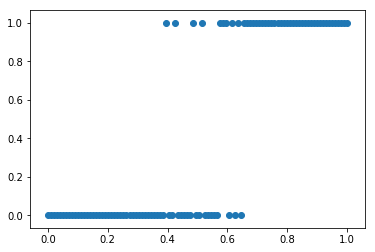

In [6]:
plt.scatter(X, y)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
model = LinearRegression()
model.fit(X,y)

plt.scatter(X,y)
plt.plot(X, model.predict(X), 'k--')
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(X,y)

In [ ]:
model.predict(X)

In [ ]:
prediction = model.predict_proba(X[:10])
prediction

In [ ]:
prediction = [p[1] for p in prediction]
prediction

In [ ]:
model = LogisticRegression()
model.fit(X,y)

prediction = model.predict_proba(X)

prediction = [p[1] for p in prediction]

plt.scatter(X,y)
plt.plot(X, prediction, 'k--')
plt.show()

### Regularized Logistic Regression

In [ ]:
def fit_and_plot_classifier(classifier):
    classifier.fit(X,y)
    
    prediction = classifier.predict_proba(X)
    prediction = [p[1] for p in prediction]
    
    plt.scatter(X, y)
    plt.plot(X, prediction, 'k--')
    plt.show()
    
    return classifier, prediction

In [ ]:
# make the penalty 4 times stronger 
classifier, prediction = fit_and_plot_classifier(LogisticRegression(C=0.25))

In [ ]:
# make the penalty 4 times weaker (less regularization)
classsifier, prediction = fit_and_plot_classifier(LogisticRegression(C=4))

In [ ]:
# Lets remove regularization
classifier, prediction = fit_and_plot_classifier(LogisticRegression(C=10000))

In [ ]:
l1 = LogisticRegression(penalty='l1', random_state=123) # TODO What is L1 and L2?
l2 = LogisticRegression(penalty='l2', random_state=123)

In [ ]:
# use of L1 regularization 4 times weaker
classifier, prediction = fit_and_plot_classifier(LogisticRegression(penalty='l1', C=4))

### Tree Ensemble Algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier, prediction = fit_and_plot_classifier(RandomForestClassifier(n_estimators=100))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
classifier, prediction = fit_and_plot_classifier(GradientBoostingClassifier(n_estimators=100))